<a href="https://colab.research.google.com/github/gagc056/knn/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

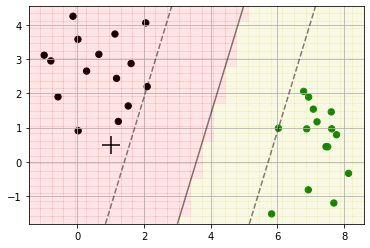

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import matplotlib

####CLASES LINEALMENTE SEPARABLES
# generamos 30 muestras con dos características, asociadas a dos clases
X, y = make_blobs(n_samples=30, n_features=2, centers=2, random_state=21,center_box=(0, 10.0))

# Creamos el modelo SVM para clasificación con kernel lineal y entrenamos el modelo
clf = svm.SVC(kernel='linear', C=100)
clf.fit(X, y)

# Graficamos los datos en el espacio de caracteríticas
cmap   = matplotlib.colors.ListedColormap( [ 'k', 'g' ] )
plt.scatter(X[:, 0], X[:, 1], c=y, s=40,cmap=cmap)

#  Creamos un mesh para evaluar la función de decisión
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Graficamos el hiperplano y el margen
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])

# Graficamos los vectores soporte
#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,facecolors='none', edgecolors='k')
Z_pred = clf.predict(np.c_[XX.ravel(), YY.ravel()])
Z_pred = Z_pred.reshape(XX.shape)

cmap   = matplotlib.colors.ListedColormap( [ 'r', 'y' ] )
plt.pcolormesh(XX, YY, Z_pred,cmap = cmap,alpha=0.1)

new_x = [[1,0.5]]
new_z = clf.predict(new_x)
if new_z[0]==0: color='k'
else: color='g'
plt.scatter(new_x[0][0],new_x[0][1] , marker = '+',color=color,s=300)
plt.grid()
plt.show()

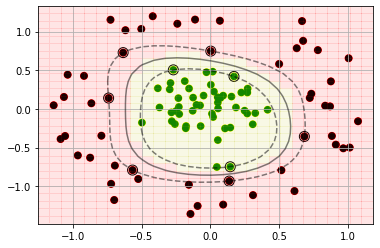

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import matplotlib

# Veamos el uso de kernels para el problema de clases linealmente no separables
from sklearn.datasets.samples_generator import make_circles

# generamos 100 muestras con dos características, asociadas a dos clases
X, y = make_circles(100, factor=.2, noise=.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# Creamos el modelo SVM para clasificación con kernel lineal/rbf y entrenamos el modelo
clf = svm.SVC(kernel='rbf', C=100).fit(X, y)

# Graficamos los datos en el espacio de caracteríticas
cmap   = matplotlib.colors.ListedColormap( [ 'k', 'g' ] )
plt.scatter(X[:, 0], X[:, 1], c=y, s=40,cmap=cmap)

#  Creamos un mesh para evaluar la función de decisión
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Graficamos el hiperplano y el margen
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])

# Graficamos los vectores soporte
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,facecolors='none', edgecolors='k')

Z_pred = clf.predict(np.c_[XX.ravel(), YY.ravel()])
Z_pred = Z_pred.reshape(XX.shape)

cmap   = matplotlib.colors.ListedColormap( [ 'r', 'y' ] )
plt.pcolormesh(XX, YY, Z_pred,cmap = cmap,alpha=0.1)

plt.grid()
plt.show()